In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import exp, sqrt
from collections import Counter
from scipy.special import comb
from scipy.stats import beta
from scipy.stats import multivariate_normal, norm
from scipy.stats import binom
from scipy.special import binom

import scipy
from sklearn.datasets import load_digits, make_swiss_roll
from sklearn.decomposition import PCA 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import seaborn as sns; sns.set(); sns.set_palette('bright')

# Topic 1
#### 1) Score: 20%) Describe which are the parameters and the hyper-parameters of the neural network. Use appropriate mathematical symbols (e.g., matrices, functions).

* **Parameters** of the neural network are the weights and the biases of its layers $W_1 , W_2 , W_{out} , b_1 , b_2 , b_{out}$ . 
  
* **Hyper-parameters** include the number of neurons in each hidden layer, learning rate, activation functions, and the number of epochs for training.

#### 2) Score: 20%) Draw a neural network that can be used to solve the above-described classification problem. Make appropriate decisions for all the hyper-parameters of the neural network. In your drawing include also the parameters of the neural network and the activation functions.

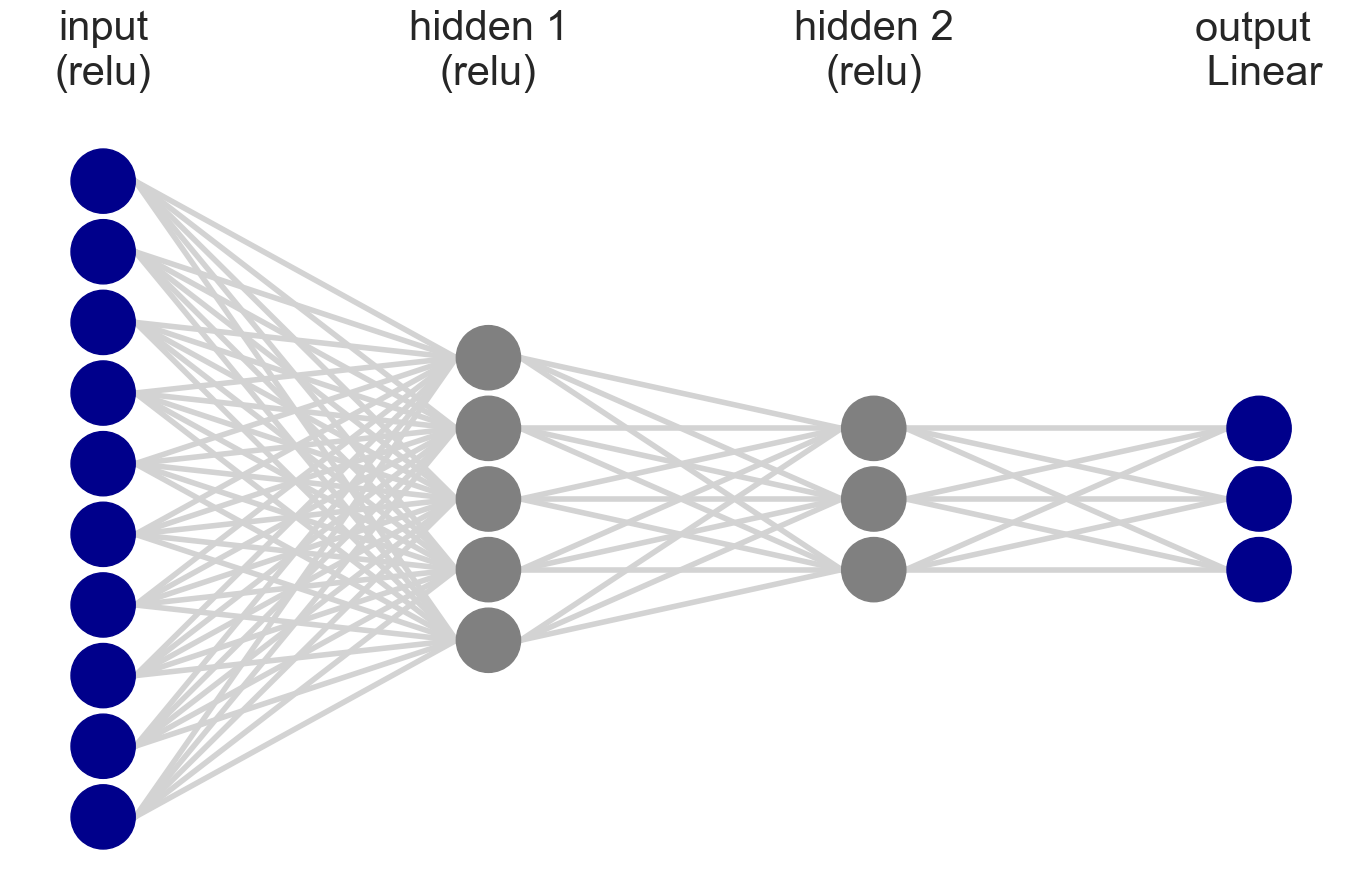

(<Figure size 20000x1000 with 1 Axes>, <AxesSubplot:>)

In [2]:
from nnv import NNV
plt.rcParams["figure.figsize"] = (200,10)   # Change default figure size
layersList = [  #Define your network architecture here
    {"title":"input\n(relu)", "units": 10, "color": "darkBlue"},
    {"title":"hidden 1\n(relu)", "units": 5},
    {"title":"hidden 2\n(relu)", "units": 3},
    {"title":"output \n Linear", "units": 3,"color": "darkBlue"},
]

NNV(layersList,max_num_nodes_visible=10, node_radius=5, spacing_layer=50, font_size=30).render() #Render the network

In this example I have chosen to use a neural network with 2 hidden layers, with 10, 5 and 3 neurons respectively. I have the ReLU activation function for the hidden layers and the linear activation function for the output layer.
Furthermore, we have
$$W_1 \in \mathbb{R}^{10 \times 5}, b_1 \in \mathbb{R}^{5}$$
$$W_2 \in \mathbb{R}^{5 \times 3}, b_2 \in \mathbb{R}^{3}$$
$$W_{out} \in \mathbb{R}^{3 \times 3}, b_{out} \in \mathbb{R}^{3}$$

### 3) Score: 20%) Describe how to estimate the values of the neural network parameters (including the optimization function), and its hyper-parameters.

* **Parameters (Weights and Biases):** On each experiment (for a specific network realization) these are estimated by training it using backpropagation and an optimization algorithm (like Gradient Descent). During training, the network adjusts these parameters to minimize the loss function.
  
* **Hyper-parameters:** These are typically chosen based on experimentation and validation performance. Techniques like grid search or random search can be used.

### 4) (Score: 20%) Write down which optimization problem you will use to optimize the network’s parameters, and describe all terms of the problem (including the dimensions of each matrix/vector).

* **Loss Function:** For regression, a common choice is Mean Squared Error (MSE). If $y_i$ is the predicted output and $t_i$ is the true target, MSE is given by 
$$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - t_i)^2$$

* MSE is used because it effectively measures the average squared difference between the estimated values and the actual value, which is appropriate for regression tasks. (This corresponds to the MLE solution for the network’s parameters)

### 5) (Score: 20%) Show that the use of the linear activation function (for all layers) makes the above network equivalent to a two-layer (no hidden layers) network. Based on the above, describe why it is important to use non-linear activation functions in neural networks

Using linear activations throughout a neural network essentially turns it into a single linear model, regardless of the number of layers, since the composition of linear functions is still linear:
$$W =W_1 W_2 W_{out}$$

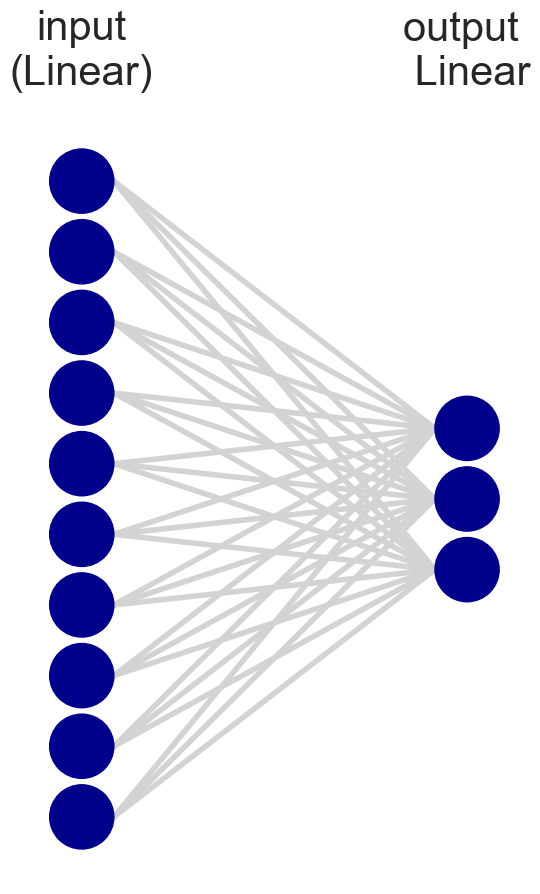

(<Figure size 20000x1000 with 1 Axes>, <AxesSubplot:>)

In [3]:
plt.rcParams["figure.figsize"] = (200,10)   # Change default figure size
layersList = [  #Define your network architecture here
    {"title":"input\n(Linear)", "units": 10, "color": "darkBlue"},
    {"title":"output \n Linear", "units": 3,"color": "darkBlue"},
]

NNV(layersList,max_num_nodes_visible=10, node_radius=5, spacing_layer=50, font_size=30).render() #Render the network

Note that
$$W \in \mathbb{R}^{10 \times 5} \mathbb{R}^{5 \times 3} \mathbb{R}^{3 \times 3} = \mathbb{R}^{10 \times 3}$$

This simplification means the network cannot model complex, nonlinear relationships in data.

# Topic 2

In [4]:
# Insert data here
data = np.array([[4., 1],
                 [2., 3.],
                 [5., 4.],
                 [1., 0.]])
print("Data: \n", data, "\n")

# Function to perform PCA
def pca_projection(data, components):
    # Compute the mean of the data
    mean = np.mean(data, axis=0)
    print ("Mean: \n", mean, "\n")

    # Center the data by subtracting the mean
    data -= mean
    print ("Centered data: \n", data, "\n")
    
    # Compute the covariance matrix
    covariance_matrix = np.cov(data, rowvar=False)
    print ("Covariance matrix: \n", covariance_matrix, "\n")
    

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    print ("Eigenvalues: \n", eigenvalues, "\n")
    print ("Remember that the eigenvectors are the columns of the eigenvector matrix")
    print ("Eigenvectors: \n", eigenvectors, "\n")

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:,sorted_indices]
    print ("sorted eigenvectors: \n", eigenvectors, "\n")

    # Select the top 'components' eigenvectors
    top_eigenvectors = eigenvectors[:, :components]
    print ("top 'components' eigenvectors: \n", top_eigenvectors, "\n")

    # Project the data
    pca_projection = np.dot(data, top_eigenvectors)

    return pca_projection

print("Projected data: \n", pca_projection(data, 2))

Data: 
 [[4. 1.]
 [2. 3.]
 [5. 4.]
 [1. 0.]] 

Mean: 
 [3. 2.] 

Centered data: 
 [[ 1. -1.]
 [-1.  1.]
 [ 2.  2.]
 [-2. -2.]] 

Covariance matrix: 
 [[3.33333333 2.        ]
 [2.         3.33333333]] 

Eigenvalues: 
 [1.33333333 5.33333333] 

Remember that the eigenvectors are the columns of the eigenvector matrix
Eigenvectors: 
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]] 

sorted eigenvectors: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 

top 'components' eigenvectors: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 

Projected data: 
 [[ 0.         -1.41421356]
 [ 0.          1.41421356]
 [ 2.82842712  0.        ]
 [-2.82842712  0.        ]]


We know the following from the slides and book:
*"To maximize the variance, we set $u_1$ equal to the eigenvector of $S$ corresponding to the largest eigenvalue $\lambda_1$. $u_1$ is called the first principal component."*

So we choose:
The top component of the eigenvector of $S$ corresponding to the largest eigenvalue $\lambda_1$.

### 2) (Score: 20%) The plot below depicts the sample points from X. We want an one-dimensional representation of the data obtained by applying PCA, so draw the principal component direction (as a line) and the projections of all four data points onto that principal component direction. Label each projected point with its principal coordinate value (where the origin’s principal coordinate is zero). Give the principal coordinate values exactly

In [5]:
# Project the data onto the first principal component
pca = PCA(n_components=1)
projected_data = pca.fit_transform(data)
print("Projected data: \n", projected_data)

Projected data: 
 [[ 4.44089210e-16]
 [-0.00000000e+00]
 [ 2.82842712e+00]
 [-2.82842712e+00]]


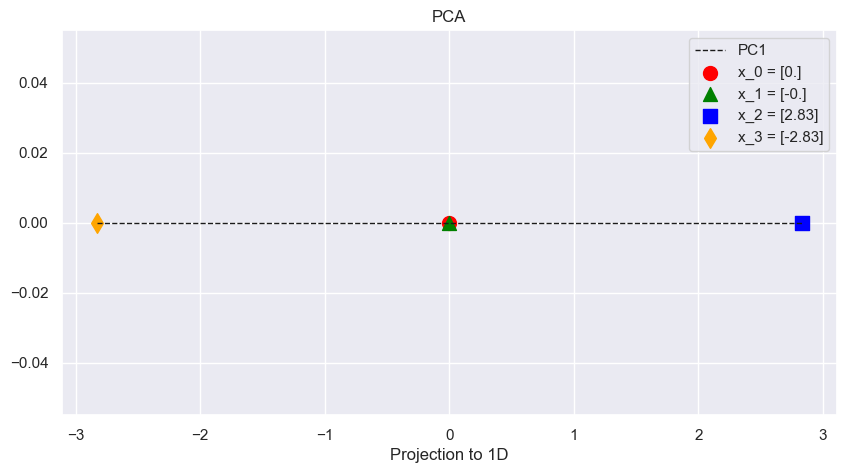

In [6]:
# Change default figure size
plt.rcParams["figure.figsize"] = (10,5)

# Colors for each point
colors = ['red', 'green', 'blue', 'orange']

# Markers for each point
markers = ['o', '^', 's', 'd']  # e.g., circle, triangle, square, diamond

# Labels for each point
labels = [f'x_1', 'x_2', 'x_3', 'x_4']

# Plot each point individually and add labels with coordinates
for i in range(len(pca.fit_transform(data))):
    x, y = pca.fit_transform(data)[i, 0], 0
    plt.scatter(x, y, color=colors[i], marker=markers[i], s=100, label = f'x_{i} = {projected_data[i].round(2)}')

plt.plot([np.min(projected_data), np.max(projected_data)], [0,0], 'k--', lw=1, label = 'PC1')
plt.xlabel('Projection to 1D')
plt.title('PCA')

plt.legend()

### 3) (Score: 30%) Consider that the data points belong to two classes: $x_1$ and $x_3$ belong to class one, and $x_2$ and $x_4$ belong to class two. Compute the discriminant axis (direction) which is the result of applying Linear Discriminant Analysis (LDA). Please provide an exact answer, without approximation.

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

target=np.array([1,2,1,2])

# Performing LDA
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(data, target)
W = lda.coef_
print("LDA weights: \n", W, "\n")

# Project the data onto the first principal component
data_lda = lda.transform(data)

LDA weights: 
 [[-1.66666667 -0.55555556]] 



### 4) Score: 20%) The plot below depicts the sample points from X. We want an one-dimensional representation of the data obtained by applying LDA, so draw the discriminant axis (direction, as a line) and the projections of all four data points onto that axis.

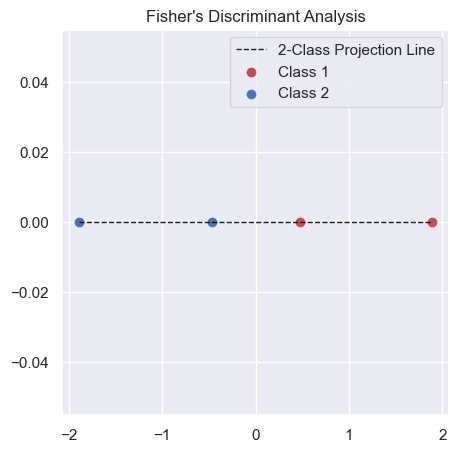

In [36]:
# Change default figure size
plt.rcParams["figure.figsize"] = (5,5)

# Plot the data in the new 1D space
plt.scatter(data_lda[target==1], np.zeros(len(data_lda[target==1])), marker='o', color='r', label = 'Class 1')
plt.scatter(data_lda[target==2], np.zeros(len(data_lda[target==2])), marker='o', color='b', label = 'Class 2')
plt.plot([np.min(data_lda), np.max(data_lda)], [0,0], 'k--', lw=1, label = '2-Class Projection Line')
plt.title('Fisher\'s Discriminant Analysis')
plt.legend()
plt.show()

# Topic 3

### 1) (Score: 20%) Would you use Linear Regression (using an indicator matrix) to classify data from the two classes? If yes, why? If no, why not?

No, Linear Regression is a linear classifier and it would misclassify around half of the data (from both classes)

### 2) (Score: 20%) Can you use a Support Vector Machine to classify data from the two classes? If yes, how this can be done? If no, why not?

We can use SVM if we use a non-linear kernel function (e.g. polynomial kernel).

### 3) (Score: 20%) There exists a data transformation yi = ϕ(xi) such that the Support Vector Machine (with linear kernel function) applied on the transformed data can provide 100% training classification performance. Write down the data transformation function yi = ϕ(xi)

The data transformation could be a popular polynomial function is:
$$y_i = \phi(x_{i}) = \begin{bmatrix} x_{0} \\ x_{1} \\ x_{0}^{2} + x_{1}^{2} \end{bmatrix}$$

### 4) Score: 20%) Draw the transformed data and the decision function of the Support Vector Machine (linear kernel function) in the new feature space and the corresponding decision function in the original feature space. When drawing the transformed data, no exact values of their dimension(s) are needed, just the rough arrangement of them in the new feature space. (You can capture the figure in a screenshot and use a drawing program, like Paint)

Below is a sketch of the transformed data
![](img/billede1.png)

Below is a sketch of the desicion function in the new feature space
![](img/billede2.png)

Below is a sketch of the desicion function in the original feature space
![](img/billede3.png)

### 5) (Score: 20%) Which are the Support Vectors (a) in the original feature space, (b) in the transformed feature space?

* a) The support vectors are the data points of each class which are closest to the decision boundary i.e. the 'circle' illustrated above.

* b) The support vectors are the data points of each class which are closest to the support vector classifier i.e. hyperplane illustrated above.